In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# veri setini indirelim 60.000resim vardır
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
#piksel değerini 0 ile 1 arasına sıkıştıralım
train_images, test_images = train_images / 255, test_images / 255

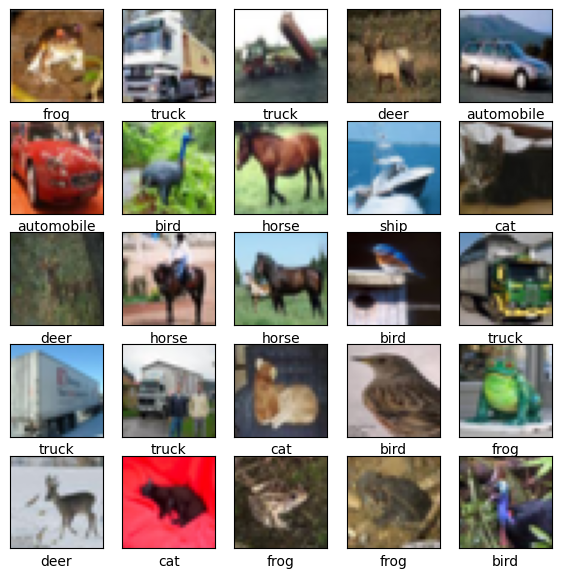

In [4]:
# verileri doğrulamak için ilk 25 görüntüyü ve isimlerini çekelim
class_names = ["airplane","automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck" ]

plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
# evrişimli katmanımızı oluşturalım
# girdi olarak  (image_height, image_width, color_channels) boyurunda resim alır
# color_channels (R,G,B) anlamına gelir

model = models.Sequential()    # model oluşturuluyor

# Conv2D katmanı oluşturuyoruz. (3,3) boyutunda 32 filitre kullanıyor. input_shape olarak 32x32  boyutunda 3renk katmanlı giriş alıyor
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# MaxPooling2D katmanını ekler. gelen özellik haritasından en büyük değeri seçer ve küçültür.
# bu katman önemli özellikleri vurgulamaya ve hesaplma maaliyetin azaltmaya yardımcı olur.
model.add(layers.MaxPooling2D((2,2)))

# ikinci Conv2D katmanını ekliyor
model.add(layers.Conv2D(64, (3,3), activation = "relu"))

# ikinci MaxPooling2D katmanını ekliyoruz
model.add(layers.MaxPooling2D((2, 2)))

# üçüncü Conv2D katmanını ekliyoruz. 64 filitre kuolanıcak
model.add(layers.Conv2D(64, (3,3), activation= "relu"))

print("Katmanlar oluşturuldu!")



Katmanlar oluşturuldu!


In [6]:
# modelimizin mimarisine bakalım
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [7]:
# Yoğuun katman oluşturlaım

# bu katman yukarıdan gelen özellik haritasını düzleştirir. tek boyutlu vektöre dönüştürür.
model.add(layers.Flatten())

# düzenlenmiş veriyi alan 64 nöron içeren tam bağlantılı(DENSE) katmanı ekler. burada daha yüksek seviyeli özellikleri öğrenir
model.add(layers.Dense(64, activation="relu"))

# kullandığımız veri 10 çıkışlı olduğu için 10 çıktılı yoğun katman oluşturacağız
model.add(layers.Dense(10))

In [8]:
# modelimizin tam mimarisine bakalım
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
# şimid modelimiz derleyelim(COMPİLE) ve eğitelim(FIT)


# Adam, gradient descent optimizasyon algoritmasının geliştirilmiş bir versiyonudur.
# kullanım amacı modelin performansını atrırarak daga hızlı öğrenmesini sağlamaktır.

# kayıp fonksiyonunu belirliyoruz
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# train_images (GÖRÜNTÜLER) ve train_labels(GÖRÜNTÜLERİN İSİMLERİ) modelin eğitim verilerini temsil eder
# epochs, modelin kaç epoch boyunca eğitileceğini belirler. bir epoch modeleni tüm eğitim verilerini birekz geçmesi anlamın gelir.
# validation, modelin her epoch sonunda test veri seti üzerindfen performansı değerlendirmeye yarar
history = model.fit(train_images, train_labels, epochs=50,
                   validation_data=(test_images, test_labels))



Epoch 1/50


1563/1563 [==============================] - 14s 8ms/step - loss: 1.5054 - accuracy: 0.4533 - val_loss: 1.2644 - val_accuracy: 0.5514
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1373 - accuracy: 0.5987 - val_loss: 1.0402 - val_accuracy: 0.6385
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9869 - accuracy: 0.6538 - val_loss: 0.9521 - val_accuracy: 0.6669
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8947 - accuracy: 0.6874 - val_loss: 1.0039 - val_accuracy: 0.6395
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8198 - accuracy: 0.7139 - val_loss: 0.8939 - val_accuracy: 0.6924
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7692 - accuracy: 0.7313 - val_loss: 0.8824 - val_accuracy: 0.6954
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7219 - accuracy: 0.7467 - val_loss: 0.8604 - val

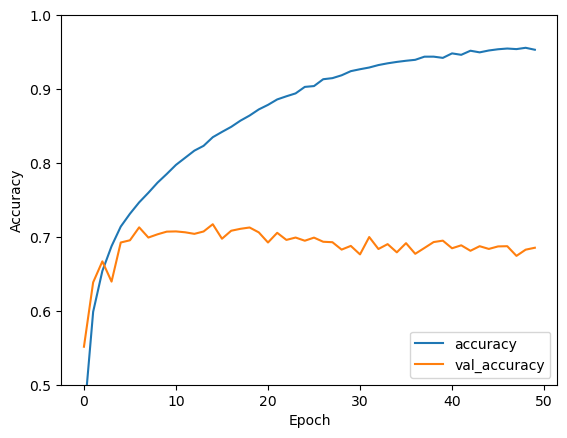

313/313 - 1s - loss: 2.4979 - accuracy: 0.6853 - 930ms/epoch - 3ms/step


In [10]:
# eğitim boyunca modelin doğruluk(ACCURACY) değerini çizdirir
# ve daha sonra test veri setinden modelin kayıp(LOSS) ve doğruluk değerini değerlendirir


plt.plot(history.history['accuracy'], label='accuracy') # eher epoch'taki eğitim setinden elde edilen doğruluk değeri
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') # her epoc'taki doğrulama setinden elde edilen değruluk değeri

# grafik ayarları:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


# modeli değerlendirme
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Test Accuracy: 68.53%
